# Content and Objectives

- Show points in the complex plane of different modulation schemes
- Show effects when adding some AWGN

# Import

In [6]:
# importing
import numpy as np
import itertools

import matplotlib.pyplot as plt
import matplotlib


In [7]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=False)

matplotlib.rc('figure', figsize=(18, 10) )


# showing figures inline
%matplotlib inline

# Show Schemes...

In [8]:
# set parameter for all schemes
M = 16

# define snr ( = Es/N0; see lecture slides )
snr_dB = 30

# number of points with noise that are shown
N_points = 1000

# choose constellation to be depicted
# options: ASK, PSK, QAM
choose_constellation = 'QAM'

In [9]:
# get constellation and normalize 
if choose_constellation == 'ASK':
    constellation =  2. * np.arange( 0, M ) - M + 1

elif choose_constellation == 'PSK':
    constellation = np.exp( 1j * 2 * np.pi * ( np.arange(1, M+1 ) -1 ) / M )

elif choose_constellation == 'QAM':
    real_part =  2. * np.arange( 0, np.sqrt(M) ) - np.sqrt(M) + 1
    imag_part =  2. * np.arange( 0, np.sqrt(M) ) - np.sqrt(M) + 1
    constellation = real_part[:, None] + 1j * imag_part[None, :]
    constellation = constellation.reshape( 1, -1 ).flatten()

constellation /= np.sqrt(np.mean(np.abs(constellation)**2))

1000.0


<Figure size 1800x1000 with 0 Axes>

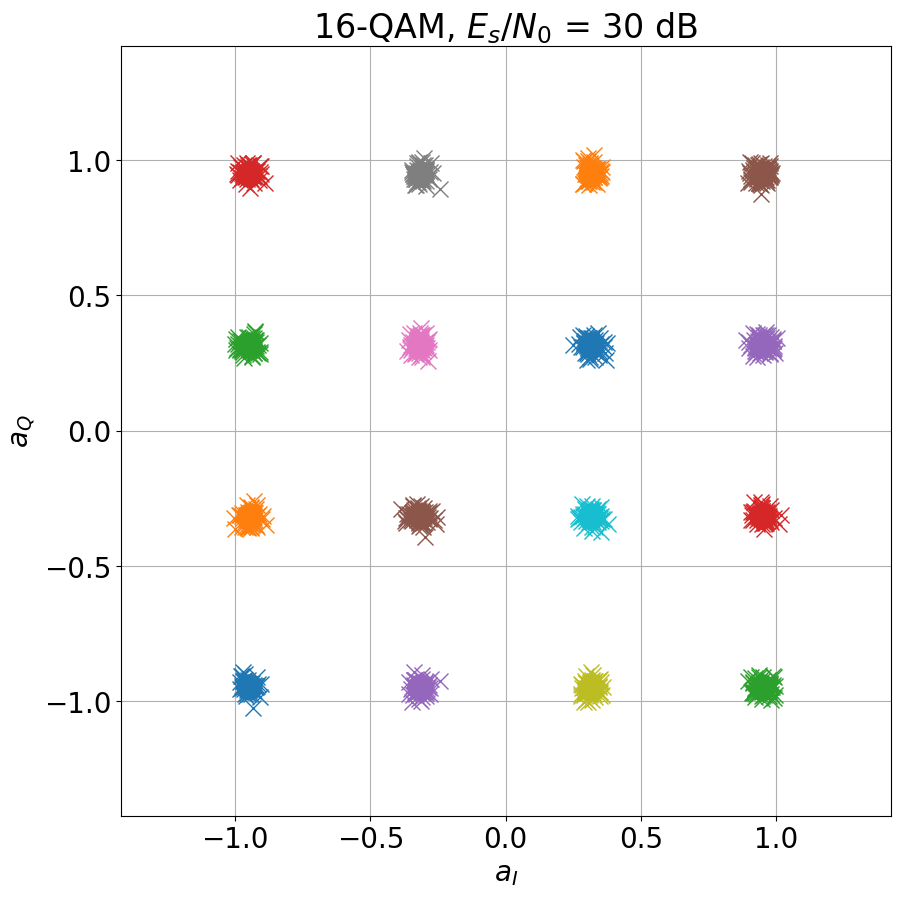

In [10]:
plt.figure()
fig, ax = plt.subplots()

# Get default Matplotlib colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors_iter = itertools.cycle(prop_cycle.by_key()['color'])  # Infinite color cycle
colors = []
for _m in range( M ):
    colors.append( next( colors_iter ) )


# plot symbol using different colors
for ind_c, val_c in enumerate( constellation ):
    plt.plot( np.real( val_c ), np.imag( val_c ), 'o', color=colors[ind_c], ms=18 )

plt.xlabel('$a_I$'); plt.ylabel('$a_Q$')
plt.grid(1); plt.title( str(M) + '-' + choose_constellation + ', $E_s/N_0$ = {} dB'.format( snr_dB ) )

ax.set_aspect("equal")  # Ensuring square aspect ratio
x_max = np.max( np.real( constellation ) ) * 1.5
ax.set_xlim( (-x_max, x_max) )
ax.set_ylim( (-x_max, x_max) )


# now let's add some noise
snr_lin = 10**( snr_dB / 10. )
sigma2 = 1 / snr_lin
print(snr_lin)

for _n in range( N_points ):
    random_index = np.random.randint( M )
    A = constellation[ random_index ]
    noise = np.sqrt( sigma2 / 2 ) * ( np.random.randn() + 1j * np.random.randn() )

    y = A + noise
    plt.plot( np.real( y ), np.imag( y ), 'x', color=colors[ random_index ], ms=12 )


plt.show()